## The Alert Packet

### To run this notebook, please [follow the instructions](https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html) or else it won`t work.
The instructions are at https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html

In the file that is opened is a typical alert packet that moves through the Lasair system.
The 3 cutout images have been removed, and the remainder converted to JSON. All the original content is preserved.
Here we see some examples of the three main data packets:
- `diaObject`: Properties of the astrophysical object such as lightcurve features and proper motion
- `diaSource`: Each represents a detection of an object that is >5 sigma from the reference
- `diaForcedSource`; Each represents a detection of an object

In [8]:
import json

In [9]:
# This function summarizes the JSON output. You can use normal print() of course 
# but there may be a large amount of output.
def printobj(name, obj, indent=''):
    if indent=='':
        print('Size of object is ', len(json.dumps(obj)), 'bytes')
    if isinstance(obj, list):
        print('%s%s is a list of %d items' % (indent, name, len(obj)))
        if len(obj) > 0:
            printobj(name+'[0]', obj[0], indent=indent+'  ')
    elif isinstance(obj, dict):
        kks = list(obj.keys())
        if len(kks) > 5:
            print('%s%s is a dict of %d items, first 5 are' % (indent, name, len(kks)))
            kks = kks[:5]
        else:
            print('%s%s is a dict of %d items' % (indent, name, len(kks)))
        for kk in kks[:5]:
            printobj(kk, obj[kk], indent=indent+'  ')
    else:
        print('%s%s: %s' % (indent, name, obj))

In [10]:
# First the diaObject
with open('json/SLSN_10321.json') as f:
    alert = json.loads(f.read())
printobj('alert', alert)

Size of object is  406583 bytes
alert is a dict of 6 items, first 5 are
  ebv: 0.0
  diaObject is a dict of 82 items, first 5 are
    diaObjectId: 12345678
    ra: 0.0
    raErr: 0.0
    decl: 0.0
    decErr: 0.0
  diaSourcesList is a list of 116 items
    diaSourcesList[0] is a dict of 140 items, first 5 are
      diaSourceId: 12345678
      visit: 12345678
      detector: 0
      diaObjectId: 12345678
      ssObjectId: 12345678
  diaForcedSourcesList is a list of 0 items
  diaNondetectionLimitsList is a list of 0 items


### Plot a Lightcurve
The `alert` is a `diaObject` + multiple `diaSource`s and `diaForcedSources`
We set up a colour scheme and use it to plot the `psfFlux` from the `diaSources`

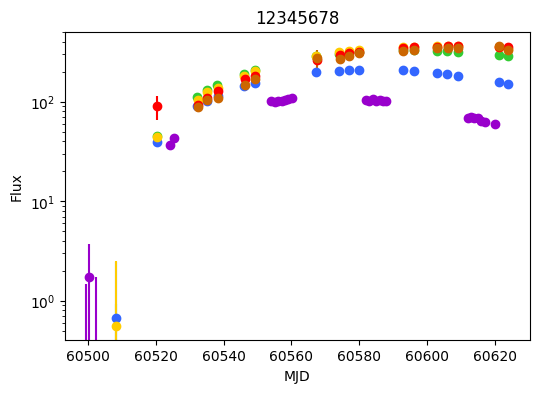

In [11]:
import matplotlib.pyplot as plt
color    = {'u':"#9900cc", 'g':"#3366ff", 'r':"#33cc33", 'i':"#ffcc00", 'z':"#ff0000", 'y':"#cc6600"}
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')
     
for band in color.keys():
    tb = []
    fb = []
    fberr = []
    for s in alert['diaSourcesList']:
        if s['band'] == band:
            tb   .append(s['midpointMjdTai'])
            fb   .append(s['psfFlux'])
            fberr.append(s['psfFluxErr'])
    ax.errorbar(tb, fb, yerr=fberr, fmt='o', color=color[band], label=band)   
plt.title(alert['diaObject']['diaObjectId'])
plt.xlabel("MJD")
plt.ylabel("Flux")
plt.show()